In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
# SEPERATE ENCODER MODEL
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# SEPERATE DECODER MODEL
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
# INPUT DATA. 
#We're using MNIST digits, and we're discarding the labels 
#(since we're only interested in encoding/decoding the input images).

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)


# len(x_train) # -> 60000
# x_train.shape[1:] #-> (28, 28)
# np.prod(x_train.shape[1:]) #-> 784
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_train.shape #-> (60000, 784)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50


InternalError: Blas GEMM launch failed : a.shape=(256, 784), b.shape=(784, 32), m=256, n=32, k=784
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_arg_input_1_0_2/_13, dense_1/kernel/read)]]
	 [[Node: loss/mul/_45 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_609_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'dense_1/MatMul', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-913fe216dceb>", line 7, in <module>
    encoded = Dense(encoding_dim, activation='relu')(input_img)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/keras/engine/topology.py", line 602, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/keras/layers/core.py", line 841, in call
    output = K.dot(inputs, self.kernel)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 998, in dot
    out = tf.matmul(x, y)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 1844, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1289, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/cakaltc1/Development/projects/github/py3_machine_learning/venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(256, 784), b.shape=(784, 32), m=256, n=32, k=784
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_arg_input_1_0_2/_13, dense_1/kernel/read)]]
	 [[Node: loss/mul/_45 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_609_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [42]:
# encoded_imgs = encoder.predict(x_test)
# encoded_imgs.shape

(10000, 32)

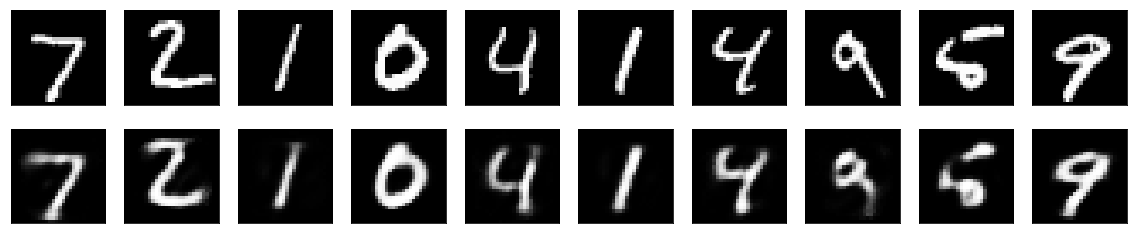

In [43]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()